# 🗺️ PyLadies Workshop: From Data to Discovery
Welcome to this hands-on workshop! We'll explore how to load, analyze, visualize and explore (geospatial) data using Python.



**Tools and packages we will use:** `pandas`, `geopandas`, `matplotlib`, `seaborn`, `folium`, `shapely`

**Dataset:**  Collection of meteorite landings worldwide + administrative boundaries of Algeria

In [ ]:
# 📦 Install needed libraries (uncomment if running outside Colab)
# !pip install pandas geopandas matplotlib seaborn

## 🔧 Step 1: Import Libraries

In [ ]:
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

## 📁 Step 2: Load the Basic Data

About Dataset:

Dataset comes from kaggle: https://www.kaggle.com/datasets/nafayunnoor/meteorite-landings-on-earth-data/data

This dataset provides a comprehensive collection of meteorite landings worldwide, compiled by The Meteoritical Society and made available through NASA’s Open Data Portal. It includes 34,513 recorded meteorites with key details such as location, type, mass, fall status (whether the meteorite was observed falling or found later), and geographical coordinates. The data has been updated to reflect new meteorite discoveries and includes fields like:

* Name & Type: Meteorite classification
* Mass (grams): Weight of the meteorite
* Fell or Found: Whether it was seen falling or later discovered
* Year: The year of discovery or fall
* Location Data: Latitude, longitude, and geo-coordinates





### 📝 Exercise 1:
Have you ever found meteorite? If a meteorite landed in your backyard, what would you do first?

### 🔢 Basic data loading, pandas data types and operations

Let's look at the data more in detail, shall we?

In [ ]:
DATA = 'https://raw.githubusercontent.com/UndeadFairy/pycon_2025_workshop/refs/heads/main/Meteorite_Landings.csv'
df = pd.read_csv(DATA)
df.head()

In [ ]:
# Deleting unnecessary columns
df.drop(["Unnamed: 10", "GeoLocation", "id"], axis=1, inplace = True)

In [ ]:
# Let's explore data types of all columns
print(df.dtypes)

🔢 Numeric Types
* Integers (int) – Whole numbers. For example, the year a meteorite fell.


* Floats (float) – Decimal numbers. We use these for values like latitude and longitude (reclat, reclong) or mass in grams (mass_(g)). Great for math and plotting!


---



📝 Text / Object Types


When you see a column listed as object, it usually means it contains text — names, IDs, or mixed content.

Examples:

* name: The name of the meteorite.

* nametype: Whether the name refers to a valid fall or not.

These aren’t for calculations, but they’re helpful for grouping, filtering, or labeling charts.


---



🔠 Categorical Types


These are text values that represent a limited number of categories — like:

* recclass: The type or class of the meteorite (like “H5”, “L6”).

* fall: Whether the meteorite was “Fell” or “Found”.

We can treat them as categories instead of plain text to make our analysis more efficient and avoid confusion (e.g., fewer typos, easier grouping).

In [ ]:
# In Pandas, we can convert a column to categorical like this:

df['fall'] = df['fall'].astype('category')

### 🧠 What’s happening in this line?

We're accessing the `fall` column using `df['fall']` — this is how we select a single column in a DataFrame.

Then we use `.astype('category')` to change the column’s data type to a *category*, which is better for repeating text values and saves memory.

The `=` assigns the updated column back into the DataFrame.


In [ ]:
# Check original memory usage
print("Before converting:")
print(df['fall'].memory_usage(deep=True), "bytes")

# Convert to category
df['fall'] = df['fall'].astype('category')

# Check new memory usage
print("\nAfter converting:")
print(df['fall'].memory_usage(deep=True), "bytes")


In [ ]:
print(df.dtypes)

In [ ]:
# let's convert year to integer values as well - this will allow us to keep NaN values
df['year'] = df['year'].astype('Int64')

🧠 Reminder:

Sometimes we need to **convert** categorical variables to numeric — especially when working with machine learning models or statistical analysis.
Data types aren’t fixed forever — they should be adapted based on what we're trying to do.

### 📁 Basic pandas dataframe explore functionalities



In [ ]:
print(f'data shape: {df.shape}')

Quick summary of numeric columns — count, mean, min, max, and percentiles.


In [ ]:
df.describe()

Shows how often each unique value appears — great for exploring categories.


In [ ]:
df['recclass'].value_counts()

Counts missing (NaN) values in each column — useful for spotting gaps.


In [ ]:
df.isna().sum()

Counts how many duplicate rows are in the DataFrame.


In [ ]:
df.duplicated().sum()

In [ ]:
print(f"min year: {df['year'].min()}")
print(f"min mass: {df['mass (g)'].min()}")

### 📝 Exercise 2:
We can use also arithmetic operators to find insights into what our data looks like.

Filter the DataFrame to show meteorites with mass (g) over 10,000.

In [ ]:
# Your code here:

## 📊 Step 3: Simple Visualizations

#### 🔎 **Exploring the Most Common Meteorite Types**


Let’s find out which meteorite classes appear most often in the dataset.

We’ll use .value_counts() to count how many meteorites belong to each class, and then show the top 10:

In [ ]:
# Top 10 Recclass by Frequency of Meteorites
items_counts = df['recclass'].value_counts(sort=False)
top = items_counts.nlargest(10) # most efficient way how to show just x largest
print ('Top 10 Recclass by Frequency of Meteorites', '\n', top)

This looks great right? Already some information is popping up. But let's visualize it now in **Quick-and-Dirty** style.



In [ ]:
# Prepare the data
top_recclass = df['recclass'].value_counts().head(10).reset_index()
top_recclass.columns = ['recclass', 'count']

In [ ]:
top_recclass.plot(kind='bar', x='recclass', y='count')

It's fast, but... kinda boring and hard to read.

✨ **Better Plot**: Cleaner, Friendlier, More Insightful (not neccesary everyone agree :) )


Next, we’ll recreate the same chart using Seaborn and matplotlib, and make it:

* Easier to read

* Nicer to look at

* Easier to get actual data

We’ll also add value labels on each bar so it’s immediately clear what we’re seeing.



In [ ]:
# Set theme
sns.set_theme(style='whitegrid')

# Meteorite-inspired colors
main_color = '#D35400'      # Iron orange
accent_color = '#4B4B4B'    # Charcoal gray


# Plot
fig, ax = plt.subplots(figsize=(12, 6))
barplot = sns.barplot(
    data=top_recclass,
    x='recclass',
    y='count',
    color=main_color
)

# Title and labels
plt.title('Top 10 Meteorite Classes by Count', fontsize=20, fontweight='bold', color=main_color, pad=15)
plt.xlabel('Recclass', fontsize=14, color=accent_color)
plt.ylabel('Count', fontsize=14, color=accent_color)

# Ticks
plt.xticks(rotation=45, ha='right', fontsize=12, color=accent_color)
plt.yticks(fontsize=12, color=accent_color)

# Grid and style
plt.grid(axis='y', linestyle='--', alpha=0.3, color=accent_color)
sns.despine()

# Add value labels
ax.bar_label(ax.containers[0], fmt='%.0f', fontsize=10, color='white',label_type='center', rotation=0)

plt.tight_layout()
plt.show()


Let's use visualisation to visually check and correct data if needed before we dive into deeper analysis.

In [ ]:
num_cols = ['mass (g)', 'year', 'reclat', 'reclong']

In [ ]:
# Set dark-earthy theme
sns.set_theme(style='whitegrid')

# Define colors
main_color = '#D35400'      # Iron orange
accent_color = '#4B4B4B'    # Charcoal gray

# Create 2x2 subplots (we have 4 columns we are interested in)
fig, axes = plt.subplots(2, 2, figsize=(14, 10))
axes = axes.flatten()  # Flatten to 1D array for easy looping

# Loop over first 4 numeric columns and axes
for i, col in enumerate(num_cols[:4]):
    ax = axes[i]
    sns.histplot(
        data=df,
        x=col,
        bins=30,
        color=main_color,
        edgecolor='white',
        linewidth=0.5,
        ax=ax
    )
    ax.set_title(f'Distribution of {col}', fontsize=14, fontweight='bold', color=main_color, pad=10)
    ax.set_xlabel(col.capitalize(), fontsize=12, color=accent_color)
    ax.set_ylabel('Frequency', fontsize=12, color=accent_color)
    ax.tick_params(axis='x', labelsize=10, colors=accent_color)
    ax.tick_params(axis='y', labelsize=10, colors=accent_color)
    ax.grid(axis='y', linestyle='--', alpha=0.3, color=accent_color)
    sns.despine(ax=ax)


plt.tight_layout()
plt.show()


Geospatial variable checks - reclong looks weird!

There should be values only between -180 and 180. Let's see what is happening

In [ ]:
df['reclong'].max()

In [ ]:
# 354.47333 - 360 = -5.52667
df.loc[df['reclong'] == 354.47333, 'reclong'] = -5.52667

📆 **Meteorite Falls Over Time**

Let’s take a look at how meteorite falls have changed over time.

We’re using a histogram to count how many meteorites were recorded in each year between 1850 and 2025:

In [ ]:
# Filter the data
filtered_df = df[(df['year'] > 1850) & (df['year'] < 2025)]

# Set plot size
plt.figure(figsize=(10, 5))

# Create the histogram
sns.histplot(data=filtered_df, x='year', bins=30)  # Adjust `bins` as needed

# Add labels and title
plt.title('Meteorite Falls by Year (1850–2025)')
plt.xlabel('Year')
plt.ylabel('Count')

plt.tight_layout()
plt.show()


# More colourful version
# # Plot
# plt.figure(figsize=(12, 6))
# sns.histplot(
#     data=filtered_df,
#     x='year',
#     bins=30,
#     color=main_color,
#     edgecolor='white',
#     linewidth=0.5
# )

# # Titles and labels
# plt.title('Meteorite Falls by Year (1850–2025)', fontsize=18, fontweight='bold', color=main_color, pad=15)
# plt.xlabel('Year', fontsize=14, color=accent_color)
# plt.ylabel('Count', fontsize=14, color=accent_color)

# # Ticks
# plt.xticks(fontsize=12, color=accent_color)
# plt.yticks(fontsize=12, color=accent_color)

# # Grid and layout
# plt.grid(axis='y', linestyle='--', alpha=0.3, color=accent_color)
# sns.despine()
# plt.tight_layout()
# plt.show()


### 📝 Exercise 3:
Find heaviest meteors and in which year they appeared. Try to plot the results.

In [ ]:
# Your code here:
# Drop missing values in mass or year

# Sort by mass (descending) and select top rows

# Show the most important columns


In [ ]:
# define chart with mass data


# Titles and labels


## 🗺️ Step 4: Geospatial analysis

In this part of the workshop, we’ll explore the **where** behind the **what** using geospatial analysis to dig into the locations of meteorite impacts across the globe.

With the help of powerful Python libraries like GeoPandas, Folium, and good old Matplotlib, we’ll map, visualize, and analyze patterns in the meteorite landing data.

Let’s take our data for a walk around the world and see what stories these coordinates can tell.

### 🕰️ What if we just plot the data using "old" methods?

Our first glance at the data is a simple scatterplot of meteorite impact points, plotted by longitude and latitude using Matplotlib. No map, no borders, just the raw coordinates.

And yet, something magical happens: the continents begin to appear, traced not by coastline but by the stories of space rocks colliding with Earth.

In [ ]:
# define a size of a chart
fig, ax = plt.subplots(figsize=(8, 5))
# configure a scatterplot of longitude (x) and latitude (y) with a color depending on column "fall"
sns.scatterplot(data=df, x="reclong", y="reclat", hue="fall")
plt.title("Longitude vs Latitude", fontsize = 18, color = 'blue')
plt.show()

### 🛰️ Projections
When we plot geographic data, we’re trying to flatten a **round planet** onto a flat surface - kind of like peeling an orange and trying to press the peel into a perfect rectangle.

This flattening is called a projection and cartographers are either loving it or having nightmaters from it.

Our scatterplot used a simple **8:5** aspect ratio to make things look roughly globe-like, but mapping libraries like Folium use a specific projection called [Web Mercator](https://en.wikipedia.org/wiki/Web_Mercator_projection) with a code **EPSG:3857**, which is used for interactive web maps (Google Maps, OpenStreetMap, Bing Maps) but slightly distorts size and shape, drastically more, the closer you get to the poles.

Understanding projections helps us interpret spatial patterns correctly, especially when we zoom out to look at the whole world.


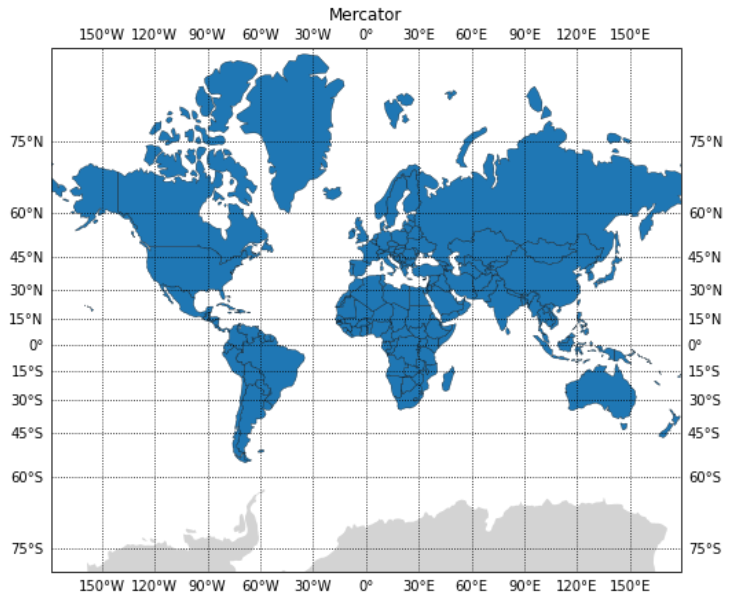

### 🌍 Introduction into Folium

In this example, we step into the interactive realm using [Folium](https://python-visualization.github.io/folium/latest/) to map all recorded meteorite landings between 1970 and 2025.

With the help of the [MarkerCluster](https://python-visualization.github.io/folium/latest/user_guide/plugins/marker_cluster.html) plugin, we can display thousands of data points without overwhelming the map. Nearby impacts are grouped together into dynamic clusters that expand as we zoom in.

This makes it easy (and fun!) to explore spatial density and discover where recent meteorite activity has been most concentrated.

The analysis will be however just visual but helps us to orient in the data with respect to surface borders and open ocean.

If you ever heard about [ipyleaflet](https://ipyleaflet.readthedocs.io/en/latest/) package, it is a suitable alternative to Folium with similar functionality.

In [ ]:
import folium
from folium.plugins import MarkerCluster

# Filter data for recent years and for "incorrect" latitude and longitude
filtered_df = df[(df['year'] > 1970) & (df['year'] < 2025)].dropna(subset=['reclat', 'reclong'])

# Create map with OpenStreetMap as basemap
m = folium.Map(location=[0, 0], zoom_start=2, tiles='OpenStreetMap')
# add plugin
marker_cluster = MarkerCluster().add_to(m)

# Add points from pandas dataframe as a folium marker
# Define a popup text (shown on click) and add them to the marker cluster
for _, row in filtered_df.iterrows():
    folium.CircleMarker(
        location=[row['reclat'], row['reclong']],
        radius=3,
        color='blue',
        fill=True,
        fill_opacity=0.6,
        popup=f"{row['name']} {row['mass (g)']}g ({int(row['year'])})"
    ).add_to(marker_cluster)

# Show map in the cell (needed in colab)
m


### 📍 Geographical borders?

It’s important to note that the clusters you see on the map aren’t based on countries, continents, or any real-world borders. Folium creates these clusters dynamically for each zoom level using an internal spatial logic that groups markers based on how close they appear on the screen not on political or geographical boundaries.

### 📝 Exercise 4:
Can you spot something wierd in the geographical distribution of our points?

```{toggle}
Hint: Look for areas with very high density of points.
```


### ⚙️ Did we filter out the incorrect points in the plot?

Good question! `.dropna()` is used specifically for removing rows with missing (NaN) values and we confirmed in the analysis part that we need that. But it does not filter rows with actual values like 0.

So, if your latitude and longitude values are exactly 0, .dropna() won't help because 0 is a valid number, not a missing one.

We need to filter them manually as 0:

```python
filtered_df = (
    df[
        (df['year'] > 1970) &
        (df['year'] < 2025) &
        (df['reclat'] != 0) &
        (df['reclong'] != 0)
    ]
    .dropna(subset=['reclat', 'reclong'])
)
```

### 🔍 "Null Island"
[Null Island](https://en.wikipedia.org/wiki/Null_Island) is the name humorously given to the point at (0° latitude, 0° longitude). It is a spot in the Gulf of Guinea off the west coast of Africa where the equator meets the prime meridian. When systems fail to record real locations, (0,0) is sometimes used as a default, causing all sorts of phantom data points to “land” there—like meteorites that never actually fell into the sea. Also there was a weather buoy stationed on 0,0 for a while!

![image](https://stamen.com/wp-content/uploads/2024/08/null-island-buoy-tombstone-1024x1024.png)

## 🧭 Step 5: Geodata for once!

In this next exercise, we will do a geographical analysis, using the power of [GeoPandas](https://geopandas.org/en/stable/) and [Shapely](https://shapely.readthedocs.io/en/stable/) to work with spatial data.

We’ll be using [administrative borders of Algeria](https://data.humdata.org/dataset/geoboundaries-admin-boundaries-for-algeria) to explore how geospatial analysis can help us understand the relationships between regions and the meteorite fall detections.

GeoPandas allows us to handle, manipulate, and visualize geospatial data, while Shapely gives us the tools to perform geometric operations like calculating areas, distances, and intersections.

In [ ]:
import geopandas as gpd
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from shapely.geometry import Point

# Load district GeoJSON of geographical boundaries
districts = gpd.read_file('https://raw.githubusercontent.com/UndeadFairy/pycon_2025_workshop/refs/heads/main/geoBoundaries-DZA-ADM2.geojson')

# Load meteorite data
# Assume your DataFrame is already named df and includes 'reclat' and 'reclong'
meteorites = (
    df[
        (df['reclat'] != 0) &
        (df['reclong'] != 0)
    ]
    .dropna(subset=['reclat', 'reclong'])
)

# Convert meteorites to GeoDataFrame with a list of geometries (Points)
geometry = [Point(xy) for xy in zip(meteorites['reclong'], meteorites['reclat'])]
# convert pandas to a geopandas dataframe (indentifying geometry column and projection)
# EPSG:4326 is latitude and longitude used in GPS
meteorite_gdf = gpd.GeoDataFrame(meteorites, geometry=geometry, crs='EPSG:4326')
# are they in same coordinate reference system?
print("Same coordinate system:", meteorite_gdf.crs == districts.crs)
# Ensure same CRS just to be sure in general
meteorite_gdf = meteorite_gdf.to_crs(districts.crs)

 By performing [spatial joins](https://geopandas.org/en/stable/gallery/spatial_joins.html), we can assign each meteorite detection to the appropriate district and uncover some patterns, such as whether certain areas are more prone to meteorite impacts than others.

In [ ]:
# Spatial join (intersect meteorites with districts)
joined = gpd.sjoin(meteorite_gdf, districts, how='inner', predicate='intersects')
# Count meteorites per district ID
counts = joined.groupby('shapeID').size().reset_index(name='meteorite_count')

Now we created a joined dataframe which contains only rows with meteorite detections (points) which intersect some of the algeria administrative border and counted them.

It may be tempting to use "shapeName" column for the grouping to get a count but always try to use IDs as they should be unique. This is even more important when you are working with a remote dataset, where you can not be sure about the quality.

See [Tamanrasset Province
](https://en.wikipedia.org/wiki/Tamanrasset_Province) and try to see values of "shapeName" column.

In [ ]:
for index, row in counts.iterrows():
    print(f"Index: {index}, Row: {row.to_dict()}")
# confirmation that there is a duplicate shapeName with a different geometry
duplicates = districts[districts['shapeName'].duplicated(keep=False)]
print(duplicates)

In [ ]:
# Merge counts back into districts
districts_counts = districts.merge(counts, left_on='shapeID', right_on='shapeID', how='left')
# fill administrative borders with no meteorite sighting as 0 for chart visualization
districts_counts['meteorite_count'] = districts_counts['meteorite_count'].fillna(0)

Now that we have received the counts, we can plot the results on a map.

In [ ]:
# Plot
sns.set_theme(style='white')
fig, ax = plt.subplots(figsize=(12, 10))
districts_counts.plot(column='meteorite_count',
                      cmap='Oranges',
                      linewidth=0.8,
                      edgecolor='gray',
                      legend=True,
                      ax=ax)
ax.set_title('Meteorite Falls per District in Algeria', fontsize=16, fontweight='bold', color='#D35400')
ax.axis('off')
plt.show()

### 📝 Exercise 5:
Plot only districts with meteorites less than 50 but larger than 0. Algeria shape will be gone :(

In [ ]:
# Your solution here:

#filtered_districts_less_meteorites = districts_counts[
#    (districts_counts[xyxyxy] > abc) &
#    (districts_counts[xyxyxy] < abcd)
#]

## 🧪 Final Exercise: Explore & Share!
**Your task:** Use the dataset to answer a question you're curious about.

In case you are really not interested in meteories, you can try to asnwer one of these questions:

- Most common meteorite type in Africa?
- How did meteorite masses change over time?
- Which regions have the rarest types?
- Are there any gaps in recorded years?
- Can you find which classes were most common in a certain time period?
- Do heavier meteorites fall more in certain regions?
- Where are the rarest meteorites found?

**Visualize your findings and be ready to share in workshop [library](https://docs.google.com/presentation/d/1Ci_U0tgG8x-uOSDEusA-wSWIXP54AYNGOF8Bl2XemlE/edit?usp=sharing)!!**

### 🧰 In case there is plenty time:

Find another auxiliary dataset and try to combine the data to gain some insights:


Combine data with UNESCO heritage sites - were they endangered by meteorites?



What about extinction events? Endangered species?